In [60]:
import coniii
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Guide to use coniii solvers: https://github.com/eltrompetero/coniii/blob/py3/ipynb/usage_guide.ipynb

In [61]:
def spinize(traces):
    stds = np.std(traces,axis=-1)
    out = np.zeros_like(traces)
    for i in range(traces.shape[0]):
        for j in range(traces.shape[1]):
            if traces[i,j]>stds[i]:
                out[i][j] = 1
            else:
                out[i][j] = -1

    return out

    

In [62]:
# import raw trace and transofrm in spins
data = np.load('../data/raw_data/nike_calcium_trace.npy')
sample = spinize(data).T
#np.save('../data/processed_data/spins.npy',sample)


In [64]:
# fit model on subset of data
n_neurons = sample.shape[1]
n_timepoints = sample.shape[0]
sub_sample = sample[:n_timepoints,:n_neurons]
solver = coniii.Pseudo(sub_sample)
solver.solve();

/Users/davide/opt/anaconda3/envs/network_inference/lib/python3.8/site-packages/coniii/solvers.py:125: UserWarning: Assuming that calc_observables should be for Ising model.
  if iprint: warn("Assuming that calc_observables should be for Ising model.")
/Users/davide/opt/anaconda3/envs/network_inference/lib/python3.8/site-packages/coniii/solvers.py:134: UserWarning: Some pairwise correlations have magnitude close to one. Potential for poor solutions from diverging parameters.
  warn(msg)


In [68]:
# unpack fitted value
h,J = solver.multipliers[:n_neurons],solver.multipliers[n_neurons:]

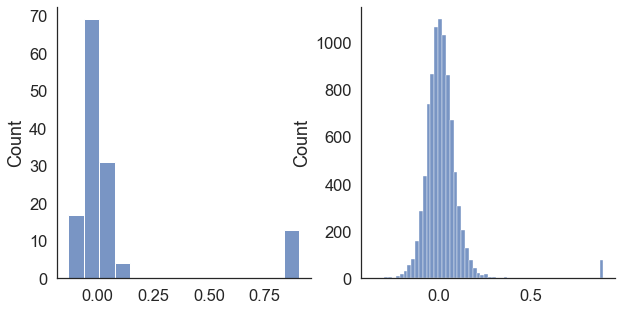

In [70]:
# histograms of values
outlier_th = 50
n_bins_h = 15
n_bins_J = 60
plt.figure(figsize=(10,5))
sns.set(font_scale=1.5,style='white')
plt.subplot(1,2,1)
sns.histplot(h[np.logical_and(h<outlier_th,h>-outlier_th)],bins=n_bins_h)
sns.despine()
plt.subplot(1,2,2)
sns.histplot(J[np.logical_and(J<outlier_th,J>-outlier_th)],bins=n_bins_J)

sns.despine()